# subvolume_inspection

Purpose: to be able to see slices of the subvolume on all three axis + Plotly 3D rendering in one place.

## Save data or not

In [1]:
save_data = True

## First things first

In [2]:
# Read from the dataset info file
import configparser
data_info = configparser.ConfigParser()
data_info.read('input_data.info')

['input_data.info']

In [3]:
# Define input data
data_dir = data_info['input_data']['data_dir']
input_prefix = data_info['input_data']['input_prefix']

# Define output data
output_prefix = data_info['output']['output_prefix']

In [4]:
 # Sanity check
print("data_dir: ", data_dir)
print("input_prefix: ", input_prefix)
print("output_prefix: ", output_prefix)

data_dir:  CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8
input_prefix:  /home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples
output_prefix:  /home/mhaya2/3d-utilities/SubvolumeVisualization/Results/InputSubvolAnalyses


In [5]:
 # Create output dir
output_dir = f'{output_prefix}/{data_dir}'

#metadata['output_dir'] = output_dir
print("output_dir: ", output_dir)

import os
if save_data:
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

output_dir:  /home/mhaya2/3d-utilities/SubvolumeVisualization/Results/InputSubvolAnalyses/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8


## Load input subvolume data

In [6]:
import numpy as np
from pathlib import Path
from PIL import Image
import re

In [7]:
dataset_dir = Path(f'{input_prefix}/{data_dir}/')

# print(dataset_dir)
files = list(dataset_dir.glob('*.tif'))
files.sort(key=lambda f: int(re.sub(r'[^0-9]*', "", str(f))))

print(files)

[PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/0.tif'), PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/1.tif'), PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/2.tif'), PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/3.tif'), PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/4.tif'), PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/5.tif'), PosixPath('/home/mhaya2/3d-utilities/SubvolumeVisualization/Data/SubvolSamples/CarbonPhantom/Col1+2/NoInkSamples/size_12_64_64/8/6.tif'), PosixPath('/home/mhaya2/3d-utilit

## Load data for inspection

In [8]:
subvolume = []
images = []
for f in files:
  i = Image.open(f)
  subvolume.append(np.array(Image.open(f), dtype=np.float32))
  images.append(i)

# convert to numpy
subvolume = np.array(subvolume) 
print(np.shape(subvolume))

(12, 64, 64)


## 2D slices along x, y, z axes

In [9]:
import matplotlib.pyplot as plt
import math

x_slices, y_slices, z_slices = np.shape(subvolume)
imgs_in_row = 6

In [10]:
cmap_choice="jet"

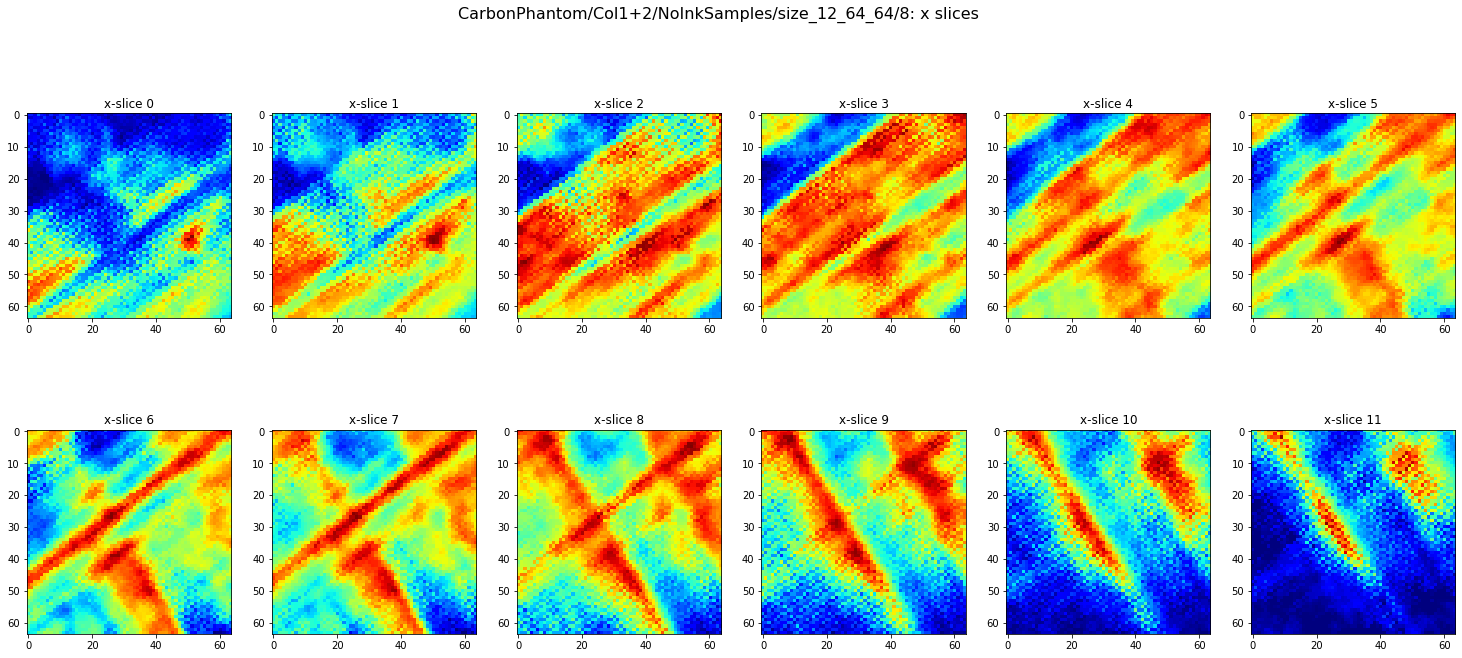

In [11]:
# Display x slices
num_rows =  math.ceil(x_slices/imgs_in_row)
figsize = (imgs_in_row*y_slices/15, num_rows*z_slices/12)
f, ax_arr = plt.subplots(num_rows, imgs_in_row, figsize=figsize)
for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
      if j*imgs_in_row+i < x_slices:
        ax.imshow(subvolume[j*imgs_in_row+i, :, :],cmap=cmap_choice)
        ax.set_title(f'x-slice {j*imgs_in_row+i}')
  
title = data_dir + ': x slices'
f.suptitle(title, fontsize=16)
if save_data:
    plt.savefig(f'{output_dir}/x_slices.png')
plt.show()

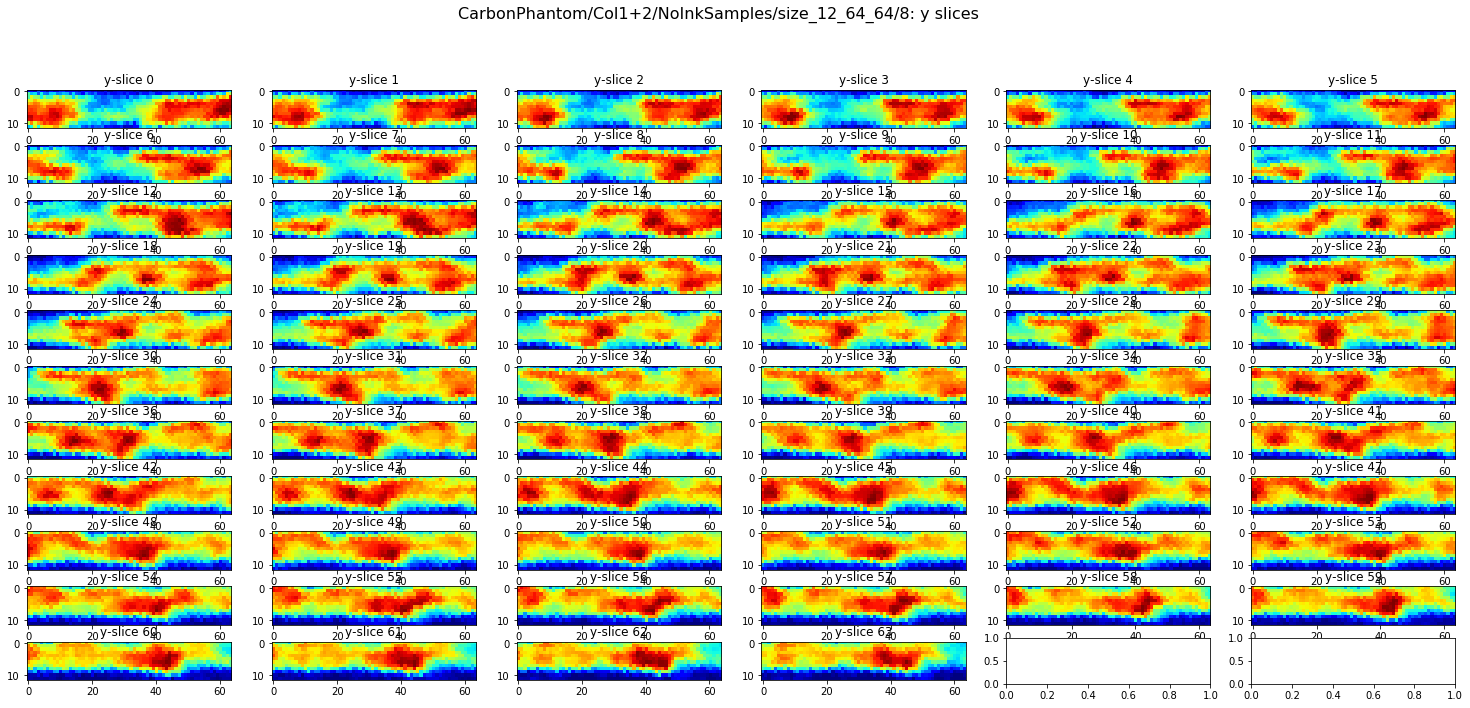

In [12]:
# Display y slices
num_rows =  math.ceil(y_slices/imgs_in_row)
figsize = (imgs_in_row*z_slices/15, num_rows*x_slices/12)
f, ax_arr = plt.subplots(num_rows, imgs_in_row, figsize=figsize)
for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
      if j*imgs_in_row+i < y_slices:
        ax.imshow(subvolume[:,j*imgs_in_row+i, :],cmap=cmap_choice)
        ax.set_title(f'y-slice {j*imgs_in_row+i}')
  
title = data_dir + ': y slices'
f.suptitle(title, fontsize=16)

if save_data:
    plt.savefig(f'{output_dir}/y_slices.png')
plt.show()

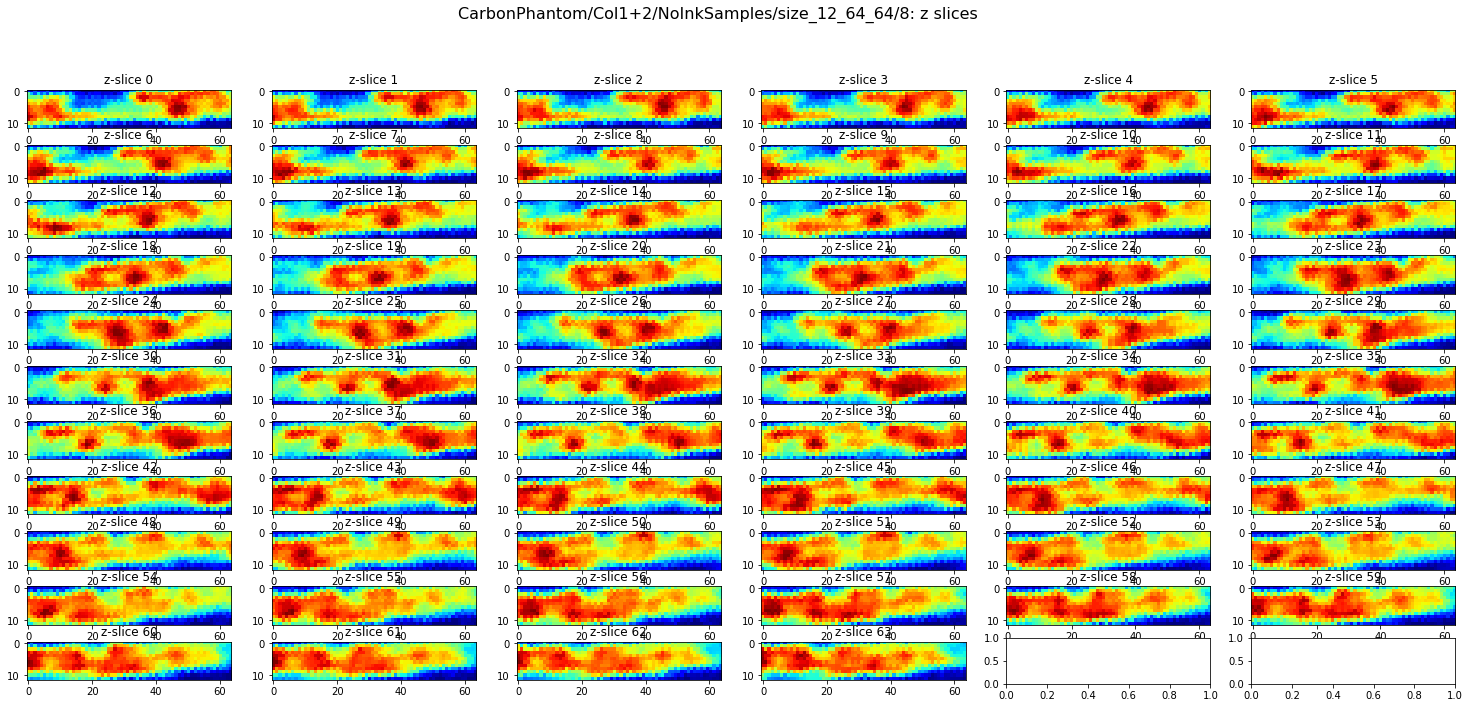

In [13]:
# Display z slices
num_rows =  math.ceil(z_slices/imgs_in_row)
figsize = (imgs_in_row*y_slices/15, num_rows*x_slices/12)
f, ax_arr = plt.subplots(num_rows, imgs_in_row, figsize=figsize)
for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
      if j*imgs_in_row+i < z_slices:
        ax.imshow(subvolume[:,:, j*imgs_in_row+i], cmap=cmap_choice)
        ax.set_title(f'z-slice {j*imgs_in_row+i}')
  
title = data_dir + ': z slices'
f.suptitle(title, fontsize=16)

if save_data:
    plt.savefig(f'{output_dir}/z_slices.png')
plt.show()

In [14]:
print(x_slices, y_slices, z_slices)
print(np.shape(subvolume))

12 64 64
(12, 64, 64)


## 3D rendering using Plotly

In [15]:
color_choice="jet"
#color_choice="rainbow"

In [16]:
import plotly.graph_objects as go

#voxel_size_um = 12.0
voxel_size_um = 1

#### 
### There seems to be a strange bug or something that prevents this 3D size from plotting correctly
### When it is np.mgrid[0:24, 0:64, 0:64], it does not result in a cube
### but when it is [0:12, ....] it does
### 
X, Y, Z = np.mgrid[0:x_slices, 0:y_slices, 0:z_slices]
#X, Y, Z = np.mgrid[0:16, 0:64, 0:64]

vol = go.Volume(
      name=data_dir,
      x = X.flatten(),
      y = Y.flatten(),
      z = Z.flatten(),
      value = subvolume.flatten(),
      opacity = 0.3,
      opacityscale = 0.3,
      surface_count = 15,
      colorscale=color_choice,
      #slices_z = dict(show=True, locations=[10]),
    )
fig = go.Figure(data=vol)


def generate_ticks(axis, interval, size_um=None):
  vals=[]
  ticks =[]

  if not size_um:
    size_um=1
  for i in range(0, axis, interval):
    vals.append(i)
    ticks.append(i*size_um)
  return (vals, [str(tick) for tick in ticks])

x_vals, x_ticks = generate_ticks(x_slices, 8)
y_vals, y_ticks = generate_ticks(y_slices, 8)
z_vals, z_ticks = generate_ticks(z_slices, 8)

fig.update_layout(scene = dict(
                    xaxis = dict(
                        ticktext=x_ticks,
                        tickvals=x_vals),
                    yaxis = dict(
                        ticktext=y_ticks,
                        tickvals=y_vals),
                    zaxis = dict(
                        ticktext=z_ticks,
                        tickvals=z_vals)),
                 scene_aspectmode='data')

if save_data:
    fig.write_image(f'{output_dir}/plotly_volume.png')

    
fig.show()